# Exploring Data Summary from Tilde

## &nbsp;Table of contents
### 1. Building the Basic Tilde Query
### 2. Building a Tilde Query with a specific domain
### 3. Find station locations and display on a map
### 4. Station data and data range graphs

## &nbsp;1. Building the Basic Tilde Query

###### Import required modules and set the source URL

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#API version 3
source = 'https://tilde.geonet.org.nz/v3'

### A basic query with no parameters applied

This query returns information on the different data domains held in Tilde using the 'dataSummary' endpoint `https://tilde.geonet.org.nz/v3/dataSummary/`.

######  Set the URL of a basic data summary query

In [3]:
url = source+'/dataSummary/'

In [4]:
r = requests.get(url)
print (r)

<Response [200]>


###### Store the response as a nested dictionary and see the output

A nested dictionary in python is a dictionary within a dictionary. It's a collection of dictionaries into one single directory. <br>
In TILDE, each data domain has different entries which sit within that specific domain name. For example, DART data sit within the _dart_ domain. By creating a nested dictionary we can specify the domain and then split it by domain name. 

In [5]:
summary = r.json()
type(summary)

dict

In [6]:
summary

{'domains': {'coastal': {'domain': 'coastal',
   'description': 'Coastal Tsunami Gauge Network',
   'recordCount': 75405608,
   'seriesCount': 73,
   'stationCount': 19,
   'earliestRecord': '2022-10-30T22:40:15Z',
   'latestRecord': '2023-05-01T14:59:45Z'},
  'dart': {'domain': 'dart',
   'description': 'Deep-ocean Assessment and Reporting of Tsunami',
   'recordCount': 125752630,
   'seriesCount': 116,
   'stationCount': 12,
   'earliestRecord': '2019-12-13T00:00:00Z',
   'latestRecord': '2023-05-01T12:00:00Z'},
  'envirosensor': {'domain': 'envirosensor',
   'description': 'Environmental Sensors',
   'recordCount': 14412033,
   'seriesCount': 237,
   'stationCount': 18,
   'earliestRecord': '2018-08-10T01:40:00Z',
   'latestRecord': '2023-05-01T14:50:00Z'}}}

######  Specifying the domains from the summary

In [7]:
domains = summary['domains']
domains

{'coastal': {'domain': 'coastal',
  'description': 'Coastal Tsunami Gauge Network',
  'recordCount': 75405608,
  'seriesCount': 73,
  'stationCount': 19,
  'earliestRecord': '2022-10-30T22:40:15Z',
  'latestRecord': '2023-05-01T14:59:45Z'},
 'dart': {'domain': 'dart',
  'description': 'Deep-ocean Assessment and Reporting of Tsunami',
  'recordCount': 125752630,
  'seriesCount': 116,
  'stationCount': 12,
  'earliestRecord': '2019-12-13T00:00:00Z',
  'latestRecord': '2023-05-01T12:00:00Z'},
 'envirosensor': {'domain': 'envirosensor',
  'description': 'Environmental Sensors',
  'recordCount': 14412033,
  'seriesCount': 237,
  'stationCount': 18,
  'earliestRecord': '2018-08-10T01:40:00Z',
  'latestRecord': '2023-05-01T14:50:00Z'}}

**Access Method 1 - Use the items method to access each entry**
<br>
To have actual information about the domain you can print out the key-value pairs as shown below. In this case we print out various item names that have been returned for our _dart_ domain in the response above. We are printing out each item line by line, with the domain name being at the top. 

In [8]:
#iterate over key,value pairs and print the results
for domain,detail in domains.items():
    print ('For Domain = ', domain)     
    print ('\tDomain name =', detail.get('domain_name'))
    print ('\tDescription =', detail.get('description'))
    print ('\tRecord count =', detail.get('recordCount'))
    print ('\tSeries count =', detail.get('seriesCount'))
    print ('\tStation count =', detail.get('stationCount'))
    print ('\tEarliest record =', detail.get('earliestRecord'))
    print ('\tLatest record =', detail.get('latestRecord'))

For Domain =  coastal
	Domain name = None
	Description = Coastal Tsunami Gauge Network
	Record count = 75405608
	Series count = 73
	Station count = 19
	Earliest record = 2022-10-30T22:40:15Z
	Latest record = 2023-05-01T14:59:45Z
For Domain =  dart
	Domain name = None
	Description = Deep-ocean Assessment and Reporting of Tsunami
	Record count = 125752630
	Series count = 116
	Station count = 12
	Earliest record = 2019-12-13T00:00:00Z
	Latest record = 2023-05-01T12:00:00Z
For Domain =  envirosensor
	Domain name = None
	Description = Environmental Sensors
	Record count = 14412033
	Series count = 237
	Station count = 18
	Earliest record = 2018-08-10T01:40:00Z
	Latest record = 2023-05-01T14:50:00Z


**Access Method 2 - Summary info in table format**
<br>
Pandas dataframes can be quite useful because they enable the user to visualize information in a table instead of line-by-line as shown above. The dataframe calls for the values in the 'domains' variable that we set above and then the 'orient' (orientation) is specified to be the 'index' because we are using the highest level key as the index, and subsidiary keys as columns. Each domain has it's own row in the dataframe.

In [9]:
df = pd.DataFrame.from_dict(data=domains, orient='index')
df

,domain,description,recordCount,seriesCount,stationCount,earliestRecord,latestRecord
coastal,coastal,Coastal Tsunami Gauge Network,75405608,73,19,2022-10-30T22:40:15Z,2023-05-01T14:59:45Z
dart,dart,Deep-ocean Assessment and Reporting of Tsunami,125752630,116,12,2019-12-13T00:00:00Z,2023-05-01T12:00:00Z
envirosensor,envirosensor,Environmental Sensors,14412033,237,18,2018-08-10T01:40:00Z,2023-05-01T14:50:00Z


## &nbsp;2. Building a Tilde Query with a specific domain

This query returns information about the specific data domains provided. <br> 
The query is `https://tilde.geonet.org.nz/v3/dataSummary/[domain]`. For this example we will continue to use the dart domain.

######  Exploring summary for the dart domain
<br>
Following the same steps as above but specifying 'dart' domain after 'dataSummary'

In [10]:
mydomain='dart'
url = 'https://tilde.geonet.org.nz/v3/dataSummary/'+mydomain
r = requests.get(url)
summary = r.json()

#### Find available data methods, specifically for DART `water-height` data
For the DART data there are two sampling rates for water-height, 15 minutes (15m) and 15 seconds (15s). There is also raw data which are collected from a DART station only when it is serviced.

**Dig down to the specific key for data methods**
<br>
This shows the different data methods that are within the summary file for water-height data. We can see the number of records, earliest and latest record, number of stations collecting data, etc.

In [11]:
datatypes = summary['domain']['dart']['names']['water-height']['methods']
datatypes

{'15m': {'method': '15m',
  'aspects': {'nil': {'aspect': 'nil',
    'recordCount': 882637,
    'stationCount': 12,
    'earliestRecord': '2019-12-13T02:15:00Z',
    'latestRecord': '2023-05-01T12:00:00Z'}}},
 '15s': {'method': '15s',
  'aspects': {'nil': {'aspect': 'nil',
    'recordCount': 243087,
    'stationCount': 12,
    'earliestRecord': '2020-03-14T10:00:00Z',
    'latestRecord': '2023-04-29T13:59:45Z'}}},
 'raw': {'method': 'raw',
  'aspects': {'nil': {'aspect': 'nil',
    'recordCount': 30875281,
    'stationCount': 8,
    'earliestRecord': '2019-12-13T00:00:00Z',
    'latestRecord': '2022-08-14T22:59:45Z'}}}}

## &nbsp;3. Find station locations and display on a map
<BR> For this we'll use the coastal tsunami gauge data.

**Access Method 1 - Using the specific key for station metadata**

In [12]:
mydomain='coastal'
url = 'https://tilde.geonet.org.nz/v3/dataSummary/'+mydomain
r = requests.get(url)
summary = r.json()

In [13]:
stations = summary['domain']['coastal']['stations']

Using stations.items we can specify what variables we are after, e.g. station, latitude, longitude and then print these. The key used is also the station. 

In [14]:
for key,val in stations.items():
    print (key, val['station'], val['latitude'], val['longitude'])

AUCT AUCT -36.8314 174.7865
CHIT CHIT -44.024 -176.3675
CHST CHST -41.903 171.4341
CPIT CPIT -40.8993 176.2317
GBIT GBIT -36.189 175.4889
GIST GIST -38.6754 178.0229
HRMT HRMT -38.8129 175.9963
KAIT KAIT -42.4129 173.7028
LOTT LOTT -37.5504 178.159
MNKT MNKT -37.0466 174.5117
NAPT NAPT -39.4757 176.9201
NBRT NBRT -43.506 172.735
NCPT NCPT -34.4148 173.0487
OTAT OTAT -45.8143 170.6294
PUYT PUYT -46.0848 166.5894
RBCT RBCT -29.28 -177.8944
RFRT RFRT -29.2511 -177.9038
TAUT TAUT -37.6411 176.1812
WLGT WLGT -41.2845 174.7799


**Access Method 2 - Direct to a Pandas dataframe**
<br>
For easier reading we can make this information into a pandas dataframe where we are only focusing on station, latitude, and longitude. Which we can specify using `columns=[]`. So the station becomes the dataframe index and the other keys the column names. 

In [15]:
df = pd.DataFrame.from_dict(data=stations, orient='index', columns=['station', 'latitude', 'longitude'])
df

,station,latitude,longitude
AUCT,AUCT,-36.8314,174.7865
CHIT,CHIT,-44.0240,-176.3675
CHST,CHST,-41.9030,171.4341
CPIT,CPIT,-40.8993,176.2317
GBIT,GBIT,-36.1890,175.4889
GIST,GIST,-38.6754,178.0229
HRMT,HRMT,-38.8129,175.9963
KAIT,KAIT,-42.4129,173.7028
LOTT,LOTT,-37.5504,178.1590
MNKT,MNKT,-37.0466,174.5117


**Map the positions, using the dataframe as the data source**
<br>
Using cartopy https://scitools.org.uk/cartopy/docs/latest/index.html and matplotlib we can then generate a map of the stations using the values (station, latitude and longitude) from the pandas dataframe `df` that we generated in the step above. Using the station variable we can also plot the names next to the stations using `ax.text`. 

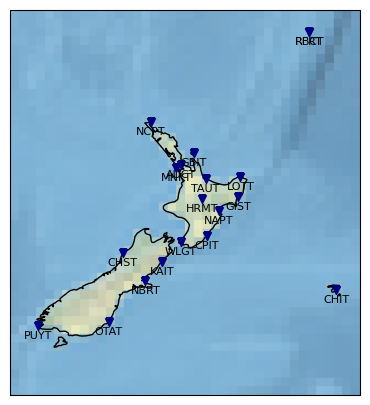

In [112]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([165, 185, -50, -28], crs=ccrs.PlateCarree())

# Put a background image on for nice sea rendering.
ax.stock_img()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

xx = df['longitude'].values
yy = df['latitude'].values
names = df['station'].values
ax.plot(xx, yy, color='navy', marker='v', linestyle='None', transform=ccrs.Geodetic())

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', y=-10)

for x, y, n in zip(xx, yy, names):
    ax.text(x, y, n, fontsize=8, verticalalignment='center', horizontalalignment='center', transform=text_transform)
             

## &nbsp;4. Station data and data plots

We want to generate a dataframe that contains all the information summarising the data available at each station. For this example we'll use the `enivirosensor` domain.

In [16]:
mydomain = 'envirosensor'
url = 'https://tilde.geonet.org.nz/v3/dataSummary/'+mydomain
r = requests.get(url)
summary = r.json()

Each station in the envirosensor domain provides several data series, and virtually no two stations are alike. This makes for a long, complex data summary. And the JSON format doesn't make it easy to read. It will be very useful if we can list each of the stations and exactly what data streams are in each record in a table-like format. We'll make a pandas dataframe for this.

We do this with a function and then call it with the output going to a dataframe.

In [17]:
def station_data(summary, domain):
    #dataframe for results
    df = pd.DataFrame()
    
    #select just station part of dictionary
    stations = summary['domain'][domain]['stations']

    #get list of stations
    # print ('##Station locations##')
    stationlist = []
    reccount = 0
    for key,val in stations.items():
        stationlist.append(key)
        # print (key, val['station_name'], val['latitude'], val['longitude'])

    #with each station, get the location information, and the sensor_codes part of the dictionary
    # print('\n')
    # print ('##Station details##')
    for sta in stationlist:
        # print ('##'+sta+'##')
        latitude = stations[sta].get('latitude')
        longitude = stations[sta].get('longitude')
        sensorcodes = stations[sta]['sensorCodes']
        # print (sensorcodes)

        codelist = []
        for key,val in sensorcodes.items():
            codelist.append(key)
            # print ('sensor code = ', val['sensor_code'])
            
        #get the names part
        for code in codelist:
            # print ('code=',code)
            names = sensorcodes[code]['names']

            namelist = []
            for key,val in names.items():
                namelist.append(key)
                # print (sta, code, val['measure_name'])

            #get the methods part    
            for name in namelist:
                # print ('name='+name)
                methods = names[name]['methods']

                methodlist = []
                for key,val in methods.items():
                    methodlist.append(key)
                    
                #get the aspects part    
                for method in methodlist:
                    # print ('method=', method)
                    aspects  = methods[method]['aspects']

                    aspectlist = []
                    for key,val in aspects.items():
                        aspectlist.append(key)
                        # print (sta, code, name, method, val['aspect'])
                        
                        #get the record data
                        for aspect in aspectlist:
                                # print ('aspect=', aspect)
                                records = aspects[aspect]
                                recordcount = records.get('recordCount')
                                earliestrecord = records.get('earliestRecord')
                                latestrecord = records.get('latestRecord')
                                # print (recordcount, earliestrecord, latestrecord)
                                            
                                #dictionary containing the various data
                                dic = {'station':sta, 'latitude':latitude, 'longitude':longitude, 'sensor_code':code, 'data_name':name, 'data_method':method, 'aspect':aspect, 'record_count':recordcount, 'earliestrecord':earliestrecord, 'latestrecord':latestrecord}
                                #make a temprary dataframe from the dictionary
                                tempdf = pd.DataFrame(dic, index=[reccount])
                                #df = df.append(d, ignore_index=True)
                                #concatenate with dataframe containing site information
                                df = pd.concat([df, tempdf])
                                reccount +=1

    df['earliestrecord'] = pd.to_datetime(df['earliestrecord'])
    df['latestrecord'] = pd.to_datetime(df['latestrecord'])
    return(df)

In [18]:
#call function to get main station data, supply the domain name
station_data = station_data(summary, mydomain)

#### Use the dataframe of station record data and visualize this in different ways

Use `station_data.head()` to see only the first few lines. If we used `station_data.tail()` we can see the last few lines. 

In [19]:
station_data.head()

,station,latitude,longitude,sensor_code,data_name,data_method,aspect,record_count,earliestrecord,latestrecord
0,ALS1R,-36.9328,174.5764,01,total-rainfall,tot,nil,9587,2023-02-24 01:10:00+00:00,2023-05-01 14:50:00+00:00
1,ALS1R,-36.9328,174.5764,02,total-rainfall,tot,nil,9587,2023-02-24 01:10:00+00:00,2023-05-01 14:50:00+00:00
2,ALS2R,-36.9598,174.4718,01,total-rainfall,tot,nil,9714,2023-02-23 04:00:00+00:00,2023-05-01 14:50:00+00:00
3,ALS2R,-36.9598,174.4718,02,total-rainfall,tot,nil,9714,2023-02-23 04:00:00+00:00,2023-05-01 14:50:00+00:00
4,FOXAG,-43.5181,170.0490,01,total-rainfall,tot,nil,196547,2019-02-06 01:10:00+00:00,2023-05-01 14:50:00+00:00


**Record count by station and sensor code**
<br>
By using `pd.pivot_table` we can transform the above table, so we can look at record_counts for each sensor_code at each station. The sensor_code is the number assigned to each physical sensor at a station. Not all stations have the same number of sensors, so at some stations the record_count will not be defined for some sensor_codes, and will be shown as `NaN`.

In [20]:
rc = pd.pivot_table(station_data, index='station', values=['record_count'], columns='sensor_code')
rc.head()

record_count                                                 \
sensor_code           01        02            03            04       05   
station                                                                   
ALS1R             9587.0    9587.0           NaN           NaN      NaN   
ALS2R             9714.0    9714.0           NaN           NaN      NaN   
FOXAG           196547.0  196510.0  87716.685185  87716.111111  87717.0   
FOXKP            30006.0       NaN  30006.000000  30006.000000  30006.0   
FOXRB            30013.0       NaN  30013.000000           NaN      NaN   

                                          
sensor_code       06  07  08  09  10  11  
station                                   
ALS1R            NaN NaN NaN NaN NaN NaN  
ALS2R            NaN NaN NaN NaN NaN NaN  
FOXAG            NaN NaN NaN NaN NaN NaN  
FOXKP        11784.0 NaN NaN NaN NaN NaN  
FOXRB            NaN NaN NaN NaN NaN NaN

We can then plot this as a bar plot using a horizontal bar chart `plot.barh`. This allows us to show the number of records for each station. We don't expect to see the same number of records for each station, but we should, largely, see the same number for each sensor_code at a given station, unless an extra sensor has been added after the station was installed.

Text(0.5, 1.0, 'Record count by sensor_code')

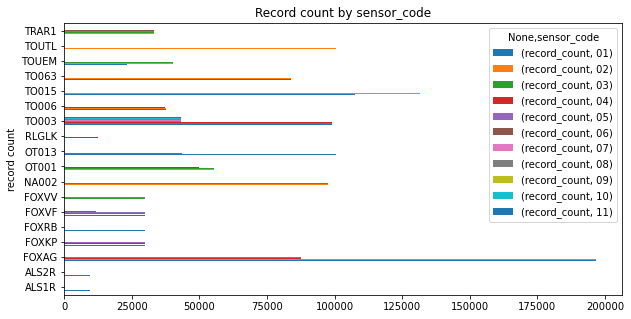

In [21]:
ax = rc.plot.barh(figsize=(10,5))
ax.set_ylabel('record count')
ax.set_title('Record count by sensor_code')

**Creating a data time-range plot, for one station, split by sensor_code**

Our intention is to show graphically the available data at one station, and to do that by sensor_code. There are too many stations to do that for all. Many stations collect data with more than one data_method, but these are all collected at the same time, so the number of `snapshot`, `min`, and `max` should always be the same. We'll therefore only display the data range for the `snapshot` data_method. So we first select only the records that have a`data_method` of `snapshot` and add then to a new dataframe called `snapshot`. <br>
Creating a dataframe with a new column entry `stasen` which combines the station and sensor_code columns, this will produce a column with values such as NA002_01, OT013_02, TO006_01,...etc that we will subsequently use as y-axis labels. This step will give you a copy warning which you can usualy safely ignore. We can then sort by this column using `snapshot.sort_values` and specifying the 'stasen' column which we just generated. To view the output of this, add `snapsorted` or `snapsorted.head()` to a new line in the code cell below and run.

In [22]:
TO003 = station_data[(station_data['data_method']=='snapshot') & (station_data['station']=='TO003')]

In [23]:
TO003['stasen'] = TO003['station'] + '_' + TO003['sensor_code']

/tmp/ipykernel_34159/3264754779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TO003['stasen'] = TO003['station'] + '_' + TO003['sensor_code']


In [24]:
TO003

,station,latitude,longitude,sensor_code,data_name,data_method,aspect,record_count,earliestrecord,latestrecord,stasen
307,TO003,-39.1097,175.6721,01,air-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_01
310,TO003,-39.1097,175.6721,02,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_02
313,TO003,-39.1097,175.6721,03,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_03
316,TO003,-39.1097,175.6721,04,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_04
319,TO003,-39.1097,175.6721,05,ground-temperature,snapshot,at-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_05
322,TO003,-39.1097,175.6721,06,ground-temperature,snapshot,20-m-north-of-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_06
325,TO003,-39.1097,175.6721,07,ground-temperature,snapshot,20-m-south-of-enclosure,43326,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_07
328,TO003,-39.1097,175.6721,08,ground-temperature,snapshot,40-m-south-of-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_08
331,TO003,-39.1097,175.6721,09,ground-selfpotential,snapshot,20-m-north-relative-to-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_09
334,TO003,-39.1097,175.6721,10,ground-selfpotential,snapshot,20-m-south-relative-to-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_10


We now want to make a new column called 'pos' that will be the position on the y-axis to plot the data range line.

In [25]:
TO003['pos'] = len(TO003) - np.arange(len(TO003))

/tmp/ipykernel_34159/622800220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TO003['pos'] = len(TO003) - np.arange(len(TO003))


In [26]:
TO003.head()

,station,latitude,longitude,sensor_code,data_name,data_method,aspect,record_count,earliestrecord,latestrecord,stasen,pos
307,TO003,-39.1097,175.6721,01,air-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_01,11
310,TO003,-39.1097,175.6721,02,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_02,10
313,TO003,-39.1097,175.6721,03,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_03,9
316,TO003,-39.1097,175.6721,04,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_04,8
319,TO003,-39.1097,175.6721,05,ground-temperature,snapshot,at-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_05,7


Now we can set up the labeling for station name vs yvalue. To set the variable `station_list` we use the `stasen` values from the dataframe, this way we will have entries for each station, sensor_code, data_method combination. The yvals are used to set the spacing between the yticks in the next plot. By using `range` which is `range([start], stop [,step])`. We can generate a list that starts at the number of station-sesnor_code pairs, stops at 0 and steps by -1.

In [27]:
station_list = TO003['stasen'].values
yvals = range((len(TO003)),0,-1)

In [28]:
TO003.head()

,station,latitude,longitude,sensor_code,data_name,data_method,aspect,record_count,earliestrecord,latestrecord,stasen,pos
307,TO003,-39.1097,175.6721,01,air-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_01,11
310,TO003,-39.1097,175.6721,02,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_02,10
313,TO003,-39.1097,175.6721,03,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_03,9
316,TO003,-39.1097,175.6721,04,fumarole-temperature,snapshot,nil,99012,2021-05-28 04:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_04,8
319,TO003,-39.1097,175.6721,05,ground-temperature,snapshot,at-enclosure,43332,2022-06-28 01:00:00+00:00,2023-05-01 14:50:00+00:00,TO003_05,7


Now we want to visualise this data.

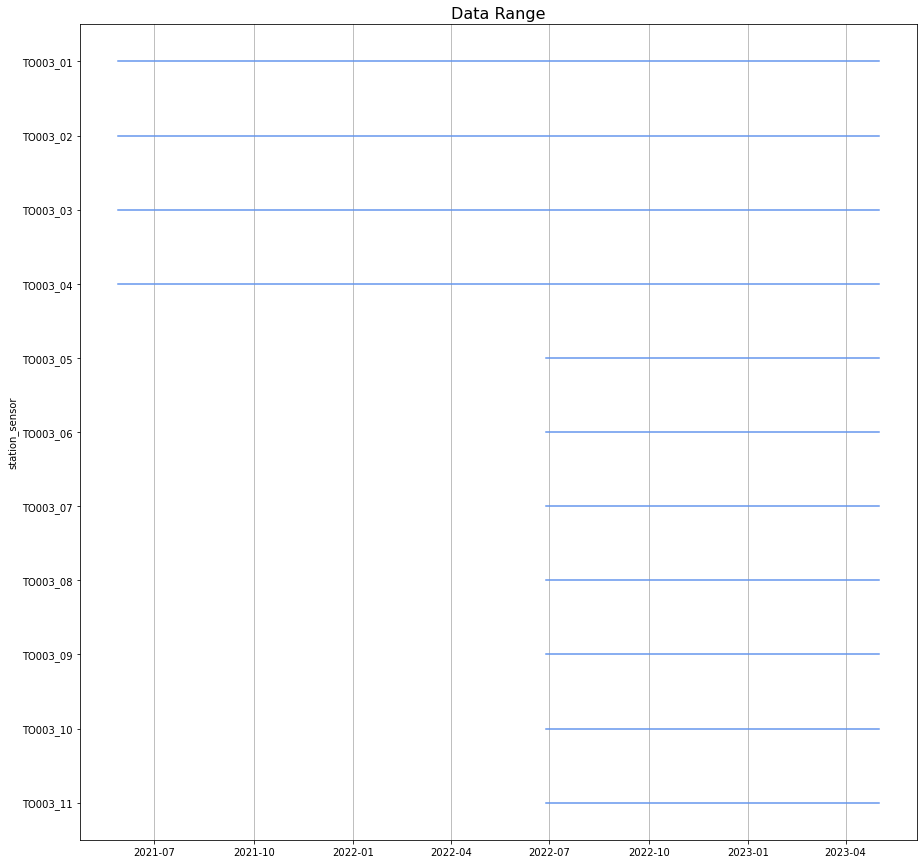

In [29]:
fig,ax = plt.subplots(figsize=(15,15))

#setting different variables, x1=earliest record, x2=latest record, y=position and c=colours of lines.
#when using ax.plot, we are going from the earliest to the latest record on the x-axis, and the y-axis is set by
#position.
# for x1, x2, y in zip(snapsorted['earliestrecord'], snapsorted['latestrecord'], snapsorted['pos']):
for x1, x2, y in zip(TO003['earliestrecord'], TO003['latestrecord'], TO003['pos']):
    ax.plot([x1, x2], [y, y], color='cornflowerblue')

#label y-axis with station_type name
ax.set_yticks(yvals)
ax.set_yticklabels(station_list)

ax.grid(axis='x')

ax.set_title('Data Range', fontsize=16)
ax.set_ylabel('station_sensor');